In [1]:
%matplotlib inline
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from MulticoreTSNE import MulticoreTSNE as TSNE

In [2]:
data_folder = 'K:\\sdp_dataset\\GPDSSyntheticSignatures4k\\bmgnet_features'

In [3]:
data_f = pd.read_csv(os.path.join(data_folder,'data_features.csv'))
visual_f = pd.read_csv(os.path.join(data_folder,'visual_features.csv'))

In [4]:
tsne = TSNE(n_jobs=8)

In [5]:
visual_f.head()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.0,0.118669,1.172929,1.222685,2.436231,0.978623,0.574977,0.439081,0.980337,0.0,...,0.287278,0.0,0.000000,1.463579,0.000000,0.587347,0.006602,0.0,0.166292,0.000000
1,0.0,0.102159,0.000000,0.918733,1.719270,0.456188,0.656368,0.122353,0.956184,0.0,...,0.115727,0.0,0.599104,1.386794,0.027456,0.641405,0.092848,0.0,0.471928,0.055559
2,0.0,0.064985,0.023189,0.782723,0.671646,0.009855,1.407754,0.461963,0.956464,0.0,...,0.411057,0.0,0.716536,1.058748,0.179106,0.684001,0.000000,0.0,0.297305,0.271356
3,0.0,0.059957,0.975151,0.895196,1.933434,0.763008,0.375753,0.155117,1.014449,0.0,...,0.339333,0.0,0.000000,1.109943,0.000000,0.000000,0.000000,0.0,0.449242,0.598309
4,0.0,0.091473,1.442126,1.497808,2.659508,0.081309,0.000000,0.188513,0.729919,0.0,...,0.000000,0.0,0.060842,0.820847,0.068798,0.000000,0.000000,0.0,0.152659,0.000000


In [6]:
data_f.head()

,path,user_id,sig_id,fakeness
0,c-001-01.jpg,1,1,0
1,c-001-02.jpg,1,2,0
2,c-001-03.jpg,1,3,0
3,c-001-04.jpg,1,4,0
4,c-001-05.jpg,1,5,0


In [47]:
sorted_id_list = np.sort(data_f['user_id'].unique())
random_50_ids = np.random.choice(sorted_id_list,size=20,replace=False)

In [48]:
X = visual_f.loc[data_f[data_f['user_id'].isin(random_50_ids)].index]
target = data_f[data_f['user_id'].isin(random_50_ids)]['fakeness']

In [49]:
Y = tsne.fit_transform(X)

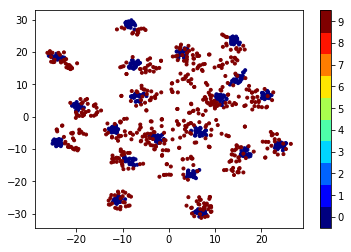

In [50]:
vis_x = Y[:, 0]
vis_y = Y[:, 1]
plt.scatter(vis_x, vis_y, c=target*10, cmap=plt.cm.get_cmap("jet", 10), marker='.')
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()